<a href="https://colab.research.google.com/github/pedrorotta/procesamiento_de_imagenes/blob/main/Introducci%C3%B3n_a_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducción a OpenCv**

En esta primera clase, veremos los principios fundamentales de la representación de una imágen en python como matriz y como tensor. Así como también veremos cuales son las formas más básicas de procesarlas

## Objetivos: 


*   Conectar con google Drive
*   Representación de una imágen
*   Representación mediante HSI
*   Intensidad de una imagen
*   Imagen Binaria
*   Guardar una imagen



## **Conectando con Google Drive**

In [1]:
#Comando para conectar con google drive y tener las carpetas de google drive vinculadas.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# os es una librería del sistema operativo que vamos a usar para poder tener una visualización general de una carpeta específica.  

import os
root = "/content/drive/MyDrive/Curso procesamiento"

In [3]:
# El comando chdir selecciona un nuevo directorio principal
os.chdir(root)

In [4]:
#Con el comando listdir podemos observar las carpetas o archivos de dicho directorio
os.listdir()

['Code+-+Modern+Computer+Vision_05_06_2022', 'images']

## **Representación de una imágen**

In [5]:
# El comando import en python se usa para importar una librería. 
# Una librería es un conjunto de archivos con múltiples funciones listas para usar en python
# Usar una librería ahorra el tiempo de realizar por ti mismo dichas funciones
#importamos la librería
import cv2

In [6]:
#Comando de versión: Un comando "oculto" de python, es el comando __version__. Este comando permite visualizar
#la versión de una librería de python. En este caso, veremos que versión tenemos de opencv
print(cv2.__version__)

4.6.0


### Abrir una imágen en python
Para abrir una imagen en python hay varias formas de hacerlo. Vamos a usar el comando cv2.imread()


In [ ]:
#para lograr entender el comando colocamos
#print(help(cv2.imread)) #Funciona en cualquier terminal
cv2.imread??

In [7]:
import cv2
img = cv2.imread('images/img1.jpg')

In [8]:
# importamos numpy que es una librería de matrices para analizar la imagen
import numpy as np

In [ ]:
#img

Cada matriz dentro del tensor img, tiene una dimensión 331x3

In [9]:
print(np.shape(img[0]))

(331, 3)


In [10]:
# El comando np.shape realiza una medición del tamaño de una matriz de rank-n 
print(np.shape(img))

(152, 331, 3)


Borrar ahorita pero anotar

In [ ]:
img_rgb = np.zeros(152,331,3) # inicializamos la imagen final
transf_matrix = np.array([[0,0,1],
                           [0,1,0],
                           [1,0,0]])
for i in range(0,np.shape(img[0])):
  current_rgb = img[:,:,i]
  

In [14]:
print(type(img))

<class 'numpy.ndarray'>


### Visualizar una imágen en python 

Para visualizar una imagen en python podemos realizarlo mediante **matplotlib** o mediante una **PIL**

In [11]:
# el from se usa cuando queremos importar solo algunos comandos de una librería
from matplotlib import pyplot as plt

In [12]:
from PIL import Image

La función imshow pertenece a la colección de funciones plt. 
Donde: 
Su argumento de entrada será un objeto que puede ser numpy array o un objeto Image que pertence a la librería PIL. (Discutiremos esto más adelante)

#### Espacio BGR y RGB

Por defecto, la librería openCV computariza la imagen en formato 

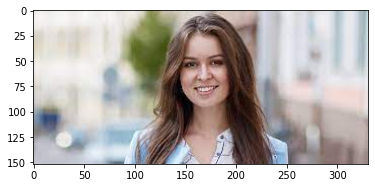

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
def show_rgb(img):
  '''
  Esta función muestra una imagen de opencv de la forma convencional sin
  cambiar de formato
  '''
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)
  plt.show()


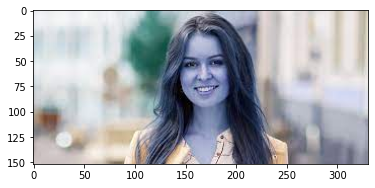

In [21]:
# Nota que si solo colocamos la imagen, el resultado sería distinto
plt.imshow(img)

In [22]:
def show_img(img):
  #Es mucho más cómodo definir una función de una imagen 
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.show()

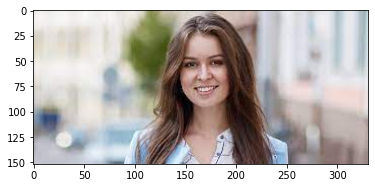

In [23]:
show_img(img)

In [ ]:
# Podemos crear una variable que convierta de BGR a RGR y usar el método de PIL que importamos para convertir la imagen

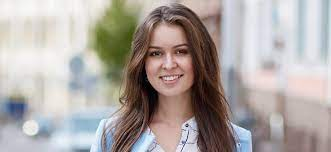

In [28]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Guarda en una variable
img_show = Image.fromarray(img_rgb,mode = 'RGB') 
display(img_show)

## Representación mediante HSI

Para representar mediante HSI podemos realizarlo mediante el comando BGR2HSV


In [33]:
img_hsi = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
print(np.shape(img_hsi)) 

(152, 331, 3)


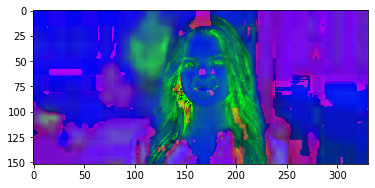

In [36]:
plt.imshow(img_hsi)
plt.show()

## Intensidad de una imagen: 

Para obtener la matriz intensidad de una imagen también podemos usar el comando cv2.COLOR

In [ ]:
img_int = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(np.shape(img_int))

(152, 331)


[[234 235 236 ... 180 196 207]
 [235 235 236 ... 180 196 208]
 [235 236 237 ... 181 197 208]
 ...
 [195 195 195 ... 138 138 138]
 [195 196 196 ... 138 138 138]
 [196 196 196 ... 138 138 138]]


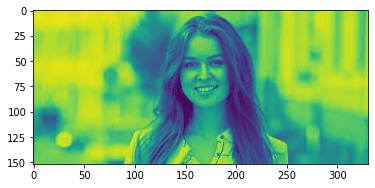

In [38]:
img_int = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_int)
plt.imshow(img_int)
plt.show()

In [47]:
img_int

array([[234, 235, 236, ..., 180, 196, 207],
       [235, 235, 236, ..., 180, 196, 208],
       [235, 236, 237, ..., 181, 197, 208],
       ...,
       [195, 195, 195, ..., 138, 138, 138],
       [195, 196, 196, ..., 138, 138, 138],
       [196, 196, 196, ..., 138, 138, 138]], dtype=uint8)

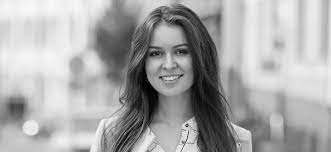

In [39]:
img_int_show = Image.fromarray(img_int,mode = 'L')
img_int_show 

## Imagen Binaria

Un primer procesamiento, es dar como resultado la matriz binaria de una imagen.

In [48]:
def show_pil(img,mode):
  img_int_show = Image.fromarray(img,mode = mode)
  return img_int_show 

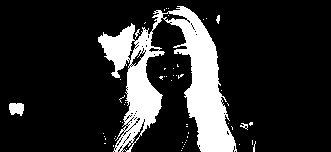

In [50]:
img_bin = np.uint8((img_int<umbral)*255)
bin_pil = Image.fromarray(img_bin,mode = 'L')
display(bin_pil)

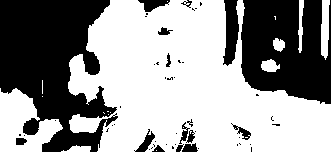

In [56]:
umbral = 200
binaria = np.uint8((img_int<umbral)*255)
binaria_show = show_pil(binaria,'L')
binaria_show

In [ ]:
def binaria(img,umbral):
  #img debe ser una matriz intensidad
  binaria = np.uint8((img<umbral)*255)
  return binaria

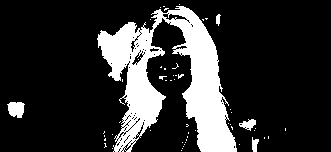

In [ ]:
img_binaria_2 = binaria(img_int,110)
img_binaria_2_show = show_pil(img_binaria_2,'L')
img_binaria_2_show

## Guardar una imagen en python

Para guardar una imagen en python usaremos el comando cv2.imwrite. 

In [ ]:
#Consultamos el comando
cv2.imwrite??

In [57]:
# Lo podemos guardar en la misma carpeta o en otra carpeta distinta
cv2.imwrite('images/imsalida.jpg',img_bin)

True

In [ ]:
# También podemos guardarlo en un formato diferente
cv2.imwrite('images/imsalida.png',img)

True

# Anexos

Modes of Pillow

The mode of an image is a string which defines the type and depth of a pixel in the image. Each pixel uses the full range of the bit depth. So a 1-bit pixel has a range of 0-1, an 8-bit pixel has a range of 0-255 and so on. The current release supports the following standard modes:

1 (1-bit pixels, black and white, stored with one pixel per byte)

L (8-bit pixels, black and white)

P (8-bit pixels, mapped to any other mode using a color palette)

RGB (3x8-bit pixels, true color)

RGBA (4x8-bit pixels, true color with transparency mask)

CMYK (4x8-bit pixels, color separation)

YCbCr (3x8-bit pixels, color video format)

Note that this refers to the JPEG, and not the ITU-R BT.2020, standard

LAB (3x8-bit pixels, the L*a*b color space)

HSV (3x8-bit pixels, Hue, Saturation, Value color space)

I (32-bit signed integer pixels)

F (32-bit floating point pixels)

# Ejercicios

In [ ]:
#1. Abre la imagen 2 usando opencv

In [ ]:
#2. Cambia el formato de la imagen 2 usando el comando BGR2RGB

In [ ]:
#3. Cambia el formato de la imagen 2 a HSI

In [ ]:
#4. Halla la matriz la intensidad de la imagen 2

In [ ]:
#5. Halla la matriz binaria de la imagen 2 

In [ ]:
#6. Guarda la imagen 2 en formato png y jpg:
  # En la misma carpeta
  # En una carpeta diferente

In [ ]:
#7 Guarda la intensidad 2 en formato png y jpg:
  # En la misma carpeta
  # En una carpeta diferente